In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh_tridiagonal
from scipy import constants

In [304]:
N = 10000 #number of intervalls. The higher N the better the numerical solution
dx = 1/N
x = np.linspace(0,1,N+1)
x = x[1:-1]
hbar=1
pi = constants.pi
m=1
L = 1000
K=hbar**2/(2*m*dx**2)

In [294]:
def V(x, m, L):
    return m*L**2*((x-0.5)**2)

In [306]:
def calc_Eig(N):
    md = 2*K+V(x, m, L) #main diagonal
    od = -K*np.ones(len(md)-1) #off diagonal
    E, psi = eigh_tridiagonal(md, od)
    psi=psi.T
    E = E/(m*L**2)
    return E, psi

In [316]:
def show_E(E):
    plt.plot(range(len(E)), E, 'b,')
    plt.show()

In [372]:
def show_psi(psi, E, n):
    plt.plot(x, V(x,m,L)/(m*L**2), color= 'black')
    for i in n:
        plt.plot(x, psi[i]+E[i])
    plt.show()

In [367]:
E, psi = calc_Eig(N)

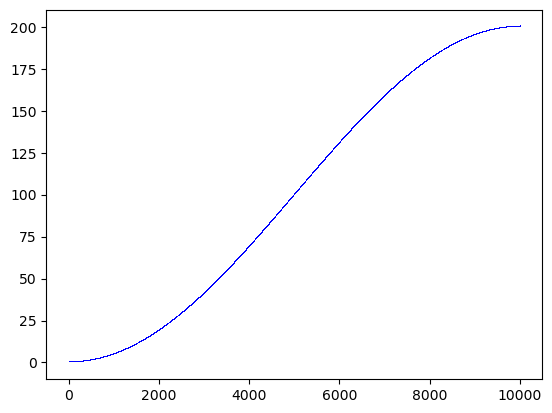

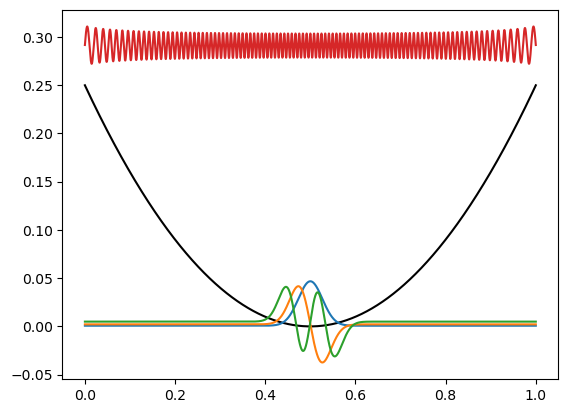

In [373]:
show_E(E)
show_psi(psi,E, [0,1,3,200])

In [341]:
from matplotlib.animation import FuncAnimation
from IPython import display
from functools import partial

In [374]:
def show_anim(i):
    fig = plt.figure()

    lines = plt.plot([])
    line = lines[0]
    print(line)
    #setup
    plt.xlim(0,1)
    plt.ylim(-1.2*max(psi[i]),1.2*max(psi[i]))
    
    anim = FuncAnimation(fig, partial(animate, psinr=i, plot=line), frames = 100, interval = 20)
    video = anim.to_html5_video()
    html = display.HTML(video)
    display.display(html)
    plt.close()

In [363]:


#plt.plot(x, V(x,m,L)/(m*L**2))

def animate(frame, psinr, plot):
    y = psi[psinr]*np.real(constants.e**(-complex(0,1)*frame/(100*2*pi)))
    plot.set_data((x, y))




In [375]:
show_anim(1)

Line2D(_child0)
